# **COVID19 Prediction Using Machine Learning**




---



---



Why is your proposal important in today's world? How predicting a disease accurately can improve medical treatment?
 ----Predicting diseases accurately using machine learning, particularly for COVID-19, holds significant importance in today's world as early detection of such diseases on the basis of symptoms can help the healthcare facility to isolate and treat the patient timely, this is crucial to prevent the spread of disease.    

How is it going to impact the medical field when it comes to effective screening and reducing health care burden?
---Our Medical facilities are using tests such as RAT(Rapid Antigen Test) to detect whether a person is covid affected, while our ML model uses patient's data to detect whether a particular patient is covid affected or not with atmost accuracy, this will help to reduce the burden of testing and screening on health care fascilities.



If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease?
--- A bad quality of data or missing data can prove to be a problem for such models but if it works well for COVID-19, we might use a similar approach for other diseases in the future. It's like having a valuable tool for our medical facilities.



## **Initial Hypothesis**

---



1.Prediction Hypothesis: We think we can predict COVID-19 by looking at symptoms and some personal info.

2.Benefits of Accurate Prediction: Accurate prediction can speed up treatment, resource use, and disease management, reducing the strain on healthcare.

3.Common Symptoms Hypothesis: COVID-19 often causes coughing, fever, and breathing problems.

4.Uncommon Symptoms Hypothesis: People without COVID-19 are less likely to have a sore throat or headache.

5.Symptoms in Specific Groups: Men with COVID-19 who've been in contact with people from other countries might have more coughing and fever.

6.Age and Severity Hypothesis: Those 60 and older might have more severe symptoms, especially trouble breathing.


## **Dataset Description**

---



| Variables | Values |
| --------- | ------ |
| Ind_ID | Patient ID |
| Test_date | Date on which test was conducted |
| Cough_symptoms | Whether the patient is having cough symptoms |
| Fever | Whether the patient is having Fever  |
| Sore_throat | Having Sore throat or not |
| Shortness of Breath | Suffering from Shortness of breath or not |
| Headache | Having Headache or not |
| Corona (Target Variable) | Whether the is result covide positive or negative |
| Age_above_60 | Is the patient elder than 60yrs |
| Sex | Male or Female |
| Known_contact | Whom the patient has came in contact with  |


## **Importing necessary libraries**

---




In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Regular EDA and plotting libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries used for Encoding:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning


In [ ]:
#Importing Dataset:
covid_data = pd.read_csv("Corona_test_data.csv")

In [ ]:
#Dataframe copy
Cd = covid_data.copy()

In [ ]:
Cd.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
Cd.shape

(278848, 11)

In [ ]:
Cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


## **DataFrame Cleaning**

---



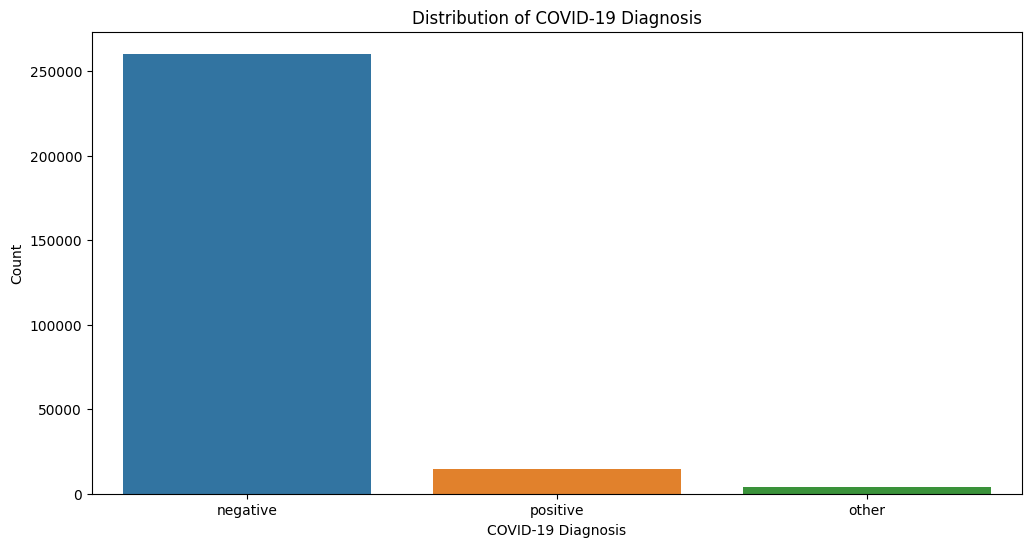

In [ ]:
# Exploratory Data Analysis (EDA)
# Visualize the data to identify patterns and correlations
plt.figure(figsize=(12, 6))
sns.countplot(x='Corona', data=Cd)
plt.title('Distribution of COVID-19 Diagnosis')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
#Listing all the variables and its unique values:

for column in Cd.columns:
  unique_values = Cd[column].unique()
  print(f"Unique Values in {column} : ", unique_values)

Unique Values in Ind_ID :  [     1      2      3 ... 278846 278847 278848]
Unique Values in Test_date :  ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Unique Values in Cough_symptoms :  ['TRUE' 'FALSE' 'None' False True]
Unique Values in Fever :  ['FALSE' 'TRUE' 'None' False True]
Unique Values in Sore_throat :  ['TRUE' 'FALSE' 'None' False True]
Unique Values in Short

In [ ]:


columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Replace boolean values and 'None' with appropriate strings and NaN
Cd[columns_to_replace] = Cd[columns_to_replace].replace({
    True: 'TRUE',
    False: 'FALSE',
    'None': np.nan
})


In [ ]:
Cd

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,NaN,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,NaN,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,NaN,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,NaN,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other
278844,278845,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
278845,278846,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278846,278847,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


In [ ]:
#Checking null values:
Cd.isnull().sum()

Ind_ID                   0
Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
Age_60_above             0
Sex                      0
Known_contact            0
dtype: int64

In [ ]:
#Dropping all the null values:
Cd.dropna(inplace = True)

In [ ]:
#Checking null values after dropping:
Cd.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

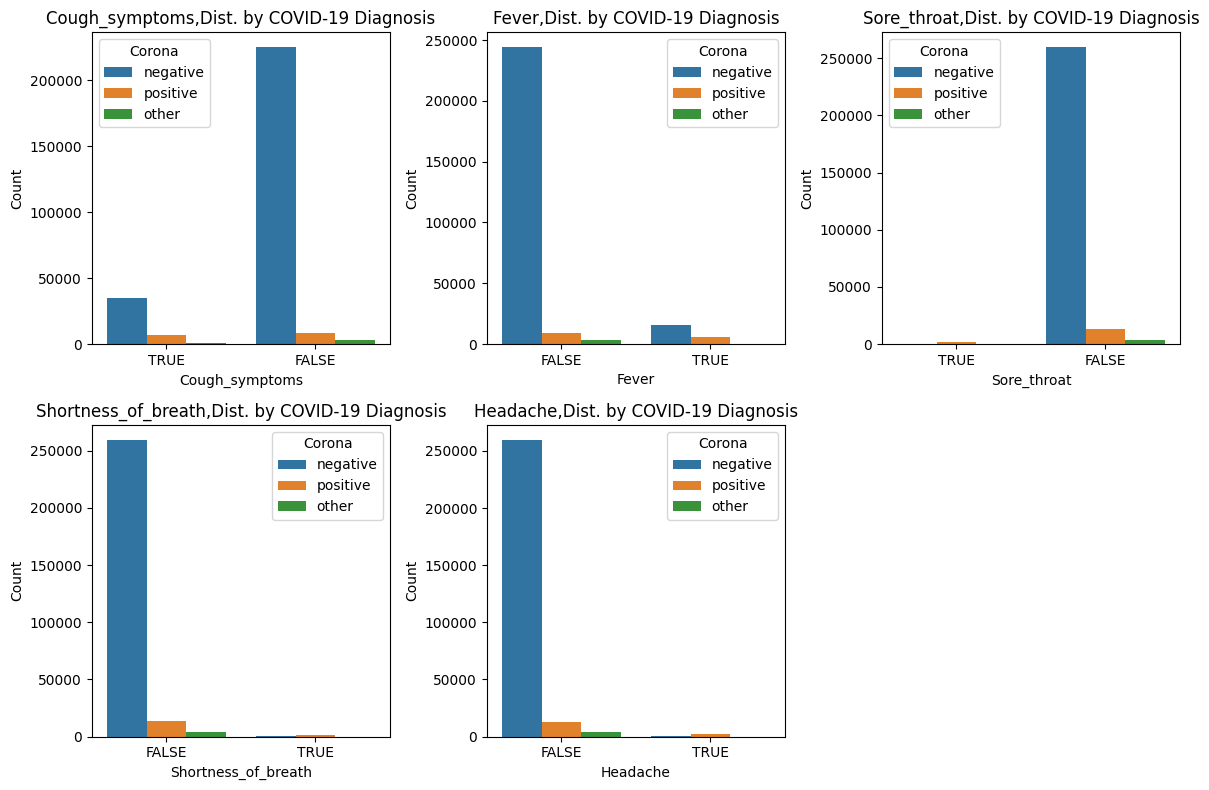

In [ ]:
# Visualization 2: Symptoms Distribution
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

plt.figure(figsize=(12, 8))
for i, symptom in enumerate(symptoms):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=symptom, data=Cd, hue='Corona')
    plt.title(f'{symptom},Dist. by COVID-19 Diagnosis')
    plt.xlabel(symptom)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#Date_Time Formatting:
Cd['Test_date'] = pd.to_datetime(Cd['Test_date'], format='%d-%m-%Y')

In [ ]:
Cd.head(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,female,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,female,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,female,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Contact with confirmed
5,6,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,other,None,female,Contact with confirmed
6,7,2020-03-11,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
7,8,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,negative,None,female,Abroad
8,9,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Abroad
9,10,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,female,Abroad


In [ ]:
#Data Splitting:

train_data = Cd.query("Test_date <= '2020-04-15' and Test_date >= '2020-03-11'")
test_data = Cd.query("Test_date > '2020-04-15'")





In [ ]:
train_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,female,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,female,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,female,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
163184,163185,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
163185,163186,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
163186,163187,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
163187,163188,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


In [ ]:
test_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,163190,2020-04-16,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Abroad
163190,163191,2020-04-16,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
163191,163192,2020-04-16,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Abroad
163192,163193,2020-04-16,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
163193,163194,2020-04-16,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other
278844,278845,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
278845,278846,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278846,278847,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


## **Deleting Date and Index Columns**


---



In [ ]:
#Deleting unnecessary variables from Train data:
train_data = train_data.drop(columns = ['Ind_ID','Test_date', 'Age_60_above', 'Sex'])

In [ ]:
train_data.head(2)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative,female,Abroad
1,FALSE,TRUE,FALSE,FALSE,FALSE,positive,female,Abroad


In [ ]:
#Deleting unnecessary variables from Test data:
test_data = test_data.drop(columns = ['Ind_ID','Test_date','Age_60_above', 'Sex'])

In [ ]:
test_data.head(2)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
163189,TRUE,FALSE,FALSE,FALSE,FALSE,negative,female,Abroad
163190,FALSE,FALSE,FALSE,FALSE,FALSE,negative,female,Other


## **Bindary Encoding For Train Data**

---



In [ ]:
bin_encoder = ce.BinaryEncoder(cols = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath', 'Headache'])

In [ ]:
train_data = bin_encoder.fit_transform(train_data)

In [ ]:
train_data.head()

,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact
0,0,1,0,1,0,1,0,1,0,1,negative,Abroad
1,1,0,1,0,1,0,0,1,0,1,positive,Abroad
2,1,0,1,0,1,0,0,1,0,1,positive,Abroad
3,0,1,0,1,1,0,0,1,0,1,negative,Abroad
4,0,1,0,1,1,0,0,1,0,1,negative,Contact with confirmed


## **Binary Encoding For Test Data**

---



In [ ]:
bin_encoder = ce.BinaryEncoder(cols = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath', 'Headache'])

In [ ]:
test_data = bin_encoder.fit_transform(test_data)

In [ ]:
test_data.head()

,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact
163189,0,1,0,1,0,1,0,1,0,1,negative,Abroad
163190,1,0,0,1,0,1,0,1,0,1,negative,Other
163191,0,1,0,1,0,1,0,1,0,1,negative,Abroad
163192,1,0,0,1,0,1,0,1,0,1,negative,Other
163193,1,0,0,1,0,1,0,1,0,1,negative,Other


## **Dummy Encoder for Train Data**

---



In [ ]:
train_data = pd.get_dummies(train_data, columns = ['Known_contact'], drop_first = True)

In [ ]:
train_data.head(2)

,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact_Contact with confirmed,Known_contact_Other
0,0,1,0,1,0,1,0,1,0,1,negative,0,0
1,1,0,1,0,1,0,0,1,0,1,positive,0,0


## **Dummy Encoder for Test Data**

---



In [ ]:
test_data = pd.get_dummies(test_data, columns = ['Known_contact'], drop_first = True)

In [ ]:
test_data.head(2)

,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact_Contact with confirmed,Known_contact_Other
163189,0,1,0,1,0,1,0,1,0,1,negative,0,0
163190,1,0,0,1,0,1,0,1,0,1,negative,0,1


## **Label Encoding for Train Data**

---



In [ ]:
LE = LabelEncoder()

In [ ]:
train_data['Corona'] = LE.fit_transform(train_data['Corona'])

In [ ]:
train_data.head(2)

,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact_Contact with confirmed,Known_contact_Other
0,0,1,0,1,0,1,0,1,0,1,0,0,0
1,1,0,1,0,1,0,0,1,0,1,2,0,0


## **Label Encoding for Test Data**

---



In [ ]:
test_data['Corona'] = LE.fit_transform(test_data['Corona'])

In [ ]:
test_data.head(2)

,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact_Contact with confirmed,Known_contact_Other
163189,0,1,0,1,0,1,0,1,0,1,0,0,0
163190,1,0,0,1,0,1,0,1,0,1,0,0,1


## **Feature Selection using Chi2**

---



In [ ]:
#Libraries required for Chi2 analysis:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:
X = train_data.drop(['Corona'], axis = 1)
y = train_data['Corona']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)
p_values = selector.pvalues_
p_values_df = pd.DataFrame({'Features': X.columns, 'P-Values': p_values})
print(p_values_df)

                                Features       P-Values
0                       Cough_symptoms_0  2.833904e-305
1                       Cough_symptoms_1   0.000000e+00
2                                Fever_0   0.000000e+00
3                                Fever_1   0.000000e+00
4                          Sore_throat_0   1.856333e-38
5                          Sore_throat_1   0.000000e+00
6                  Shortness_of_breath_0   0.000000e+00
7                  Shortness_of_breath_1   3.009087e-22
8                             Headache_0   0.000000e+00
9                             Headache_1   1.076922e-83
10  Known_contact_Contact with confirmed   0.000000e+00
11                   Known_contact_Other   0.000000e+00


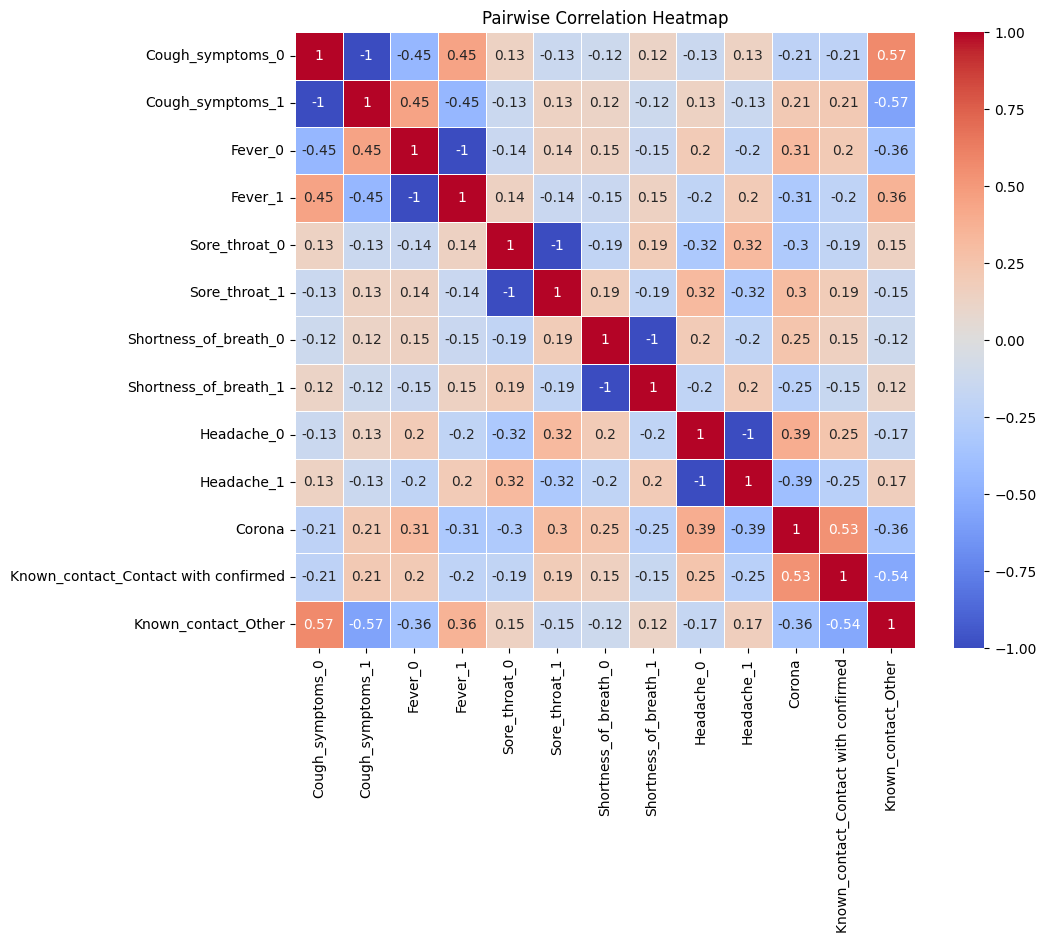

In [ ]:
# Visualization 4: Pairwise Correlation Heatmap
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

## **Selected Features**

---



The following are the features we'll use to predict our target variable (Covid19 Positive or Negative):

Cough_symptoms :  ['TRUE','FALSE']

Fever :  ['FALSE','TRUE']

Sore_throat :  ['TRUE','FALSE']

Shortness_of_breath :  ['FALSE','TRUE']

Headache :  ['FALSE','TRUE']


Known_contact :  ['Abroad','Contact with confirmed','Other']

Corona(Target Variable) :  ['negative','positive','other']

## **Data Splitting into Train and Validation Data**

---



In [ ]:
from sklearn.model_selection import train_test_split



# # Split the data into features (X) and target (y)
X = train_data.drop('Corona', axis=1)
y = train_data['Corona']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split sets
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')


X_train shape: (130348, 12)
X_val shape: (32587, 12)
y_train shape: (130348,)
y_val shape: (32587,)


##**Logistic Regression Model**

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create a LogisticRegression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_val, y_pred)*100,2)

print(f'Accuracy for Validation Data: {accuracy}')


Accuracy for Validation Data: 93.37


In [ ]:
X = test_data.drop('Corona', axis=1)
y = test_data['Corona']

# Make predictions on the test data
y_pred = model.predict(X)


# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f'Accuracy for Test Data: {accuracy}')

Accuracy for Test Data: 92.39


The accuracy we got using Logistic Regression on test data is 92.39%

In [ ]:
# Define the hyperparameter grid to search for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(best_params_lr)
print(best_model_lr)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [ ]:
lr_mod_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_lr = lr_mod_best.predict(X)
class_report_lr_best = classification_report(y, y_pred_best_lr)
print(class_report_lr_best)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    111541
           1       0.00      0.00      0.00      1420
           2       0.21      0.63      0.31      2698

    accuracy                           0.92    115659
   macro avg       0.40      0.53      0.42    115659
weighted avg       0.95      0.92      0.93    115659



In [ ]:
lrmodel_accuracy = round(accuracy_score(y, y_pred_best_lr)*100, 2)
print(lrmodel_accuracy)

92.39


With the Logistic Regression model we can predict 92.39% accurately, the best after hyperparameter tuning we are same accuracy

## **Decision Tree Model(Train)**

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_val, y_pred)*100,2)

print(f'Accuracy for Validation Data: {accuracy}')


Accuracy for Validation Data: 94.11


In [ ]:
X = test_data.drop('Corona', axis=1)
y = test_data['Corona']

y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f'Accuracy for Test Data: {accuracy}')

Accuracy for Test Data: 5.41


The accuracy we got using Decision Tree model on test data is 5.41%

In [ ]:
# Define the hyperparameter grid to search for decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(model, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(random_state=42)


In [ ]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X)
class_report_dt_best = classification_report(y, y_pred_best_dt)
print(class_report_dt_best)

              precision    recall  f1-score   support

           0       0.97      0.03      0.06    111541
           1       0.00      0.00      0.00      1420
           2       0.02      0.99      0.05      2698

    accuracy                           0.05    115659
   macro avg       0.33      0.34      0.04    115659
weighted avg       0.94      0.05      0.06    115659



In [ ]:
dtmodel_accuracy = round(accuracy_score(y, y_pred_best_dt)*100, 2)
print(dtmodel_accuracy)

5.41


With the Decision Tree model we can predict 5.41% accurately, after tuning the accuracy remains the same.

## **Random Forest Model**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = round(accuracy_score(y_val, y_pred)*100,2)

print(f'Accuracy for Validation Data: {accuracy}')


Accuracy for Validation Data: 94.11


In [ ]:
X = test_data.drop('Corona', axis=1)
y = test_data['Corona']

y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f'Accuracy for Test Data: {accuracy}')


Accuracy for Test Data: 5.41


The accuracy we got using Random Forest model on test data is 5.41%.

In [ ]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(model, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(n_estimators=50, random_state=42)


In [ ]:
rf_mod_best = RandomForestClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
rf_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf = rf_mod_best.predict(X)
class_report_rf_best = classification_report(y, y_pred_best_rf)
print(class_report_rf_best)

              precision    recall  f1-score   support

           0       0.97      0.03      0.06    111541
           1       0.00      0.00      0.00      1420
           2       0.02      0.99      0.05      2698

    accuracy                           0.05    115659
   macro avg       0.33      0.34      0.04    115659
weighted avg       0.94      0.05      0.06    115659



In [ ]:
rfmodel_accuracy = round(accuracy_score(y, y_pred_best_rf)*100, 2)
print(rfmodel_accuracy)

5.41


With the Random Forest model we can predict 5.41% accurately, after tuning the accuracy remains the same.

## **ADAboost Algorithm**

---



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the weak classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an instance of the AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0)

# Fit the AdaBoost classifier to your training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions using the trained classifier
predictions = adaboost_classifier.predict(X_val)

# Calculate the accuracy of the model
acc = round(accuracy_score(y_val, predictions)*100,2)
print(f"Accuracy Score for Validation Data :{acc}")

Accuracy Score for Validation Data :92.92


In [ ]:
X = test_data.drop('Corona', axis=1)
y = test_data['Corona']

predictions = adaboost_classifier.predict(X)

# Calculate the accuracy of the model
acc = round(accuracy_score(y, predictions)*100,2)
print(f"Accuracy Score for Test Data :{acc}")


The accuracy we got using ADAboost Algorithm on test data is 93.33%.

In [ ]:
# Define the hyperparameter grid to search for Adaboost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # AdaBoost algorithm variant
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_ada = grid_search.best_params_
best_score_ada = grid_search.best_score_

print(best_params_ada)
print(best_score_ada)


{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
0.931843929633321


In [ ]:
ada_mod_best = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 1.0, n_estimators= 50)
ada_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_ada = ada_mod_best.predict(X)
class_report_ada_best = classification_report(y, y_pred_best_ada)
print(class_report_ada_best)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    111541
           1       0.00      0.00      0.00      1420
           2       0.38      0.57      0.45      2698

    accuracy                           0.96    115659
   macro avg       0.45      0.51      0.48    115659
weighted avg       0.95      0.96      0.95    115659



In [ ]:
ada_model_accuracy = round(accuracy_score(y, y_pred_best_ada)*100, 2)
print(ada_model_accuracy)

95.63


With the ADAboost algorithm we can predict 93.33% accurately, after tuning we are getting  95.63% accuracy

## **Model Comparison**

---



In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'ADAboost']
accuracy_scores = [lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, ada_model_accuracy]

trace = go.Bar(
    x=models,
    y=accuracy_scores,
    text=[f'{score}%' for score in accuracy_scores],
    marker=dict(color='lightblue', line=dict(color='black', width=1.5)),
)

data = [trace]

layout = go.Layout(
    title='Comparison of Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Scores'),
)

fig = go.Figure(data=data, layout=layout)


pyo.iplot(fig)

#Model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)


            Model_Name Accuracy Score
0             ADAboost         95.63%
1  Logistic Regression         92.39%
2        Decision Tree          5.41%
3        Random Forest          5.41%


From the above bar chart we can conclude that ADAboost algorithm is the best fit for our Covid19 detection model with an accuracy of 95.63%

##**Conclusion:**

---





*   The highest accuracy our model achieved was 95.63%.

---



###What Next?
A good next step would be to discuss with our team or research on our own different options of going forward.

Could we collect more data based on the most important features?

Could we try some more models?

Could you improve the current models (beyond what we've done so far)?

The key here is to remember, our biggest restriction will be time. Hence, it's paramount to minimise the time between experiments.

The more we try, the more we figure out what doesn't work, the more we'll start to get a hang of what works.

---

